In [1534]:
# COMP9727 Assignment

# Michael Papantoniou
# z5164398

In [1535]:
#Part 1

In [1536]:
# Part 1 Question 1

# In the tutorial the regex applied was for news stories, whereas for this assignment it is for songs, songs can often times have lyrics 
# with double meanings or when a punctuation mark can significantly change the lyric. As such i believe that the regex might remove 
# too many punctuations as such I have added full stops, commas, exclaimation marks and apostraphes to help allow for more meaning in 
# the lyrics to stay intact.

# As for the training-test split vs the k-fold cross validation, since the dataset is heavily unbalanced with emotion and lifestyle 
# topics being under represented, the training-test split might result in an unlucky split where the training set has no emotion or lifestyle 
# songs and the test set has all of them resulting in terrible classification results. Allowing for 5 fold cross validation would remove this 
# possiblity and also allow for better results by simulating more data for the model to classify, especially when stratified k-fold cross
# validation is used, allowing each fold to have roughly the same percentage of each topic. As such I shall perform a 5-fold cross validation. 

In [1537]:
# Loading the Data

import pandas as pd


topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness' ]
dataset = pd.read_csv('dataset.tsv', sep='\t')
data = dataset.iloc[:, :5].astype(str).apply(' '.join, axis=1)
df = pd.DataFrame({
    'Content': data,
    'Topic': dataset.iloc[:, 5]
})

print(df)

                                                Content      Topic
0     loving the not real lake 2016 rock awake know ...       dark
1     incubus into the summer 2019 rock shouldn summ...  lifestyle
2     reignwolf hardcore 2016 blues lose deep catch ...    sadness
3     tedeschi trucks band anyhow 2016 blues run bit...    sadness
4     lukas nelson and promise of the real if i star...       dark
...                                                 ...        ...
1495  ra ra riot absolutely 2016 rock year absolutel...    emotion
1496  mat kearney face to face 2018 rock breakthroug...       dark
1497  owane born in space 2018 jazz look look right ...       dark
1498  nappy roots blowin' trees 2019 hip hop nappy r...   personal
1499  skillet stars 2016 rock speak word life begin ...    sadness

[1500 rows x 2 columns]


In [1538]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()

In [1539]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1480 non-null   object
 1   Topic    1480 non-null   object
dtypes: object(2)
memory usage: 34.7+ KB
None


In [1584]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

df_token = df.copy()
df_lower = df.copy()
df_special = df.copy()
df_stop = df.copy()
df_stem = df.copy()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s,!'.]", '', text)     # I have added commas, fullstops, apostraphes and exclaimation marks
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document
df['Content'] = df['Content'].apply(preprocess_text)

# Define preprocessing function
def preprocess_token(text):
    tokens = word_tokenize(text)
    return ' '.join(tokens)

# Apply preprocessing to each document
df_token['Content'] = df_token['Content'].apply(preprocess_token)

# Define preprocessing function
def preprocess_lower(text):
    text = text.lower()
    return text

# Apply preprocessing to each document

df_lower['Content'] = df_lower['Content'].apply(preprocess_lower)

# Define preprocessing function
def preprocess_special(text):
    text = re.sub(r"[^\w\s,!'.]", '', text)     # I have added commas, fullstops, apostraphes and exclaimation marks
    
    return text

# Apply preprocessing to each document

df_special['Content'] = df_special['Content'].apply(preprocess_special)

# Define preprocessing function
def preprocess_stop(text):
    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to each document

df_stop['Content'] = df_stop['Content'].apply(preprocess_stop)

# Define preprocessing function
def preprocess_stem(text):
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document

df_stem['Content'] = df_stem['Content'].apply(preprocess_stem)


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Content'])
X_token = vectorizer.fit_transform(df_token['Content'])
X_lower = vectorizer.fit_transform(df_lower['Content'])
X_special = vectorizer.fit_transform(df_special['Content'])
X_stop = vectorizer.fit_transform(df_stop['Content'])
X_stem = vectorizer.fit_transform(df_stem['Content'])

BNB = BernoulliNB()

MNB = MultinomialNB()

# Cross Validation
BNB_accuracy = cross_val_score(BNB, X, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy = cross_val_score(MNB, X, df['Topic'], cv=5, scoring='accuracy')

BNB_accuracy_token = cross_val_score(BNB, X_token, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy_token = cross_val_score(MNB, X_token, df['Topic'], cv=5, scoring='accuracy')

BNB_accuracy_lower = cross_val_score(BNB, X_lower, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy_lower = cross_val_score(MNB, X_lower, df['Topic'], cv=5, scoring='accuracy')

BNB_accuracy_special = cross_val_score(BNB, X_special, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy_special = cross_val_score(MNB, X_special, df['Topic'], cv=5, scoring='accuracy')

BNB_accuracy_stop = cross_val_score(BNB, X_stop, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy_stop = cross_val_score(MNB, X_stop, df['Topic'], cv=5, scoring='accuracy')

BNB_accuracy_stem = cross_val_score(BNB, X_stem, df['Topic'], cv=5, scoring='accuracy')
MNB_accuracy_stem = cross_val_score(MNB, X_stem, df['Topic'], cv=5, scoring='accuracy')

df_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy,
    'MNB Accuracy': MNB_accuracy
})


df_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy), np.mean(MNB_accuracy)]
print("\n All steps \n")
print(df_score.to_markdown(index=False), "\n")


df_token_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy_token,
    'MNB Accuracy': MNB_accuracy_token
})


df_token_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy_token), np.mean(MNB_accuracy_token)]
print("\n Only Tokenising\n")
print(df_token_score.to_markdown(index=False), "\n")


df_lower_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy_lower,
    'MNB Accuracy': MNB_accuracy_lower
})


df_lower_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy_lower), np.mean(MNB_accuracy_lower)]
print("\nOnly Lowercase\n")
print(df_lower_score.to_markdown(index=False), "\n")


df_special_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy_special,
    'MNB Accuracy': MNB_accuracy_special
})


df_special_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy_special), np.mean(MNB_accuracy_special)]
print("\n Only removing specials \n")
print(df_special_score.to_markdown(index=False), "\n")


df_stop_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy_stop,
    'MNB Accuracy': MNB_accuracy_stop
})


df_stop_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy_stop), np.mean(MNB_accuracy_stop)]
print("\n Only removing stopwords \n")
print(df_stop_score.to_markdown(index=False), "\n")


df_stem_score = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy_stem,
    'MNB Accuracy': MNB_accuracy_stem
})


df_stem_score.loc['Mean'] = ['Mean', np.mean(BNB_accuracy_stem), np.mean(MNB_accuracy_stem)]
print("\n Only stemming \n")
print(df_stem_score.to_markdown(index=False), "\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



 All steps 

| Fold   |   BNB Accuracy |   MNB Accuracy |
|:-------|---------------:|---------------:|
| 1      |       0.496622 |       0.780405 |
| 2      |       0.530405 |       0.797297 |
| 3      |       0.567568 |       0.817568 |
| 4      |       0.510135 |       0.746622 |
| 5      |       0.523649 |       0.783784 |
| Mean   |       0.525676 |       0.785135 | 


 Only Tokenising

| Fold   |   BNB Accuracy |   MNB Accuracy |
|:-------|---------------:|---------------:|
| 1      |       0.496622 |       0.780405 |
| 2      |       0.530405 |       0.797297 |
| 3      |       0.567568 |       0.817568 |
| 4      |       0.510135 |       0.746622 |
| 5      |       0.52027  |       0.783784 |
| Mean   |       0.525    |       0.785135 | 


Only Lowercase

| Fold   |   BNB Accuracy |   MNB Accuracy |
|:-------|---------------:|---------------:|
| 1      |       0.496622 |       0.780405 |
| 2      |       0.530405 |       0.797297 |
| 3      |       0.567568 |       0.817568 |
|

In [1541]:
# Part 1 Question 2

# After developing both BNB and MNB, normally special characters should be removed before tokenisation and the special characters are replaced with 
# spaces, and tokenising removes any one letter words and converts everything else into tokens, stopwords are removed to help vectorisers contextualise 
# the text better by removing filler words that in theory have no effect on the meaning of the text, and lowercasing is to reduce the dimension of the 
# text by removing capitals, essentially making capitalised and lowercase versions of a word the same. and stemming does something similar by 
# reducing variations of words into the base words. 

# I tested each step independently and saw that each step has almost no bearing on the overall accuracy

# After testing with both MNB and BNB, it seems that having no preprocessing steps, or all steps included makes no real difference in the 
# overall accuracy

# Currently my preprocessing steps only includes all steps of preprocessing. The order is lowercasing, then removing special characters, tokenising, 
# then removing stop words and finally stemming.


In [1588]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer50 = CountVectorizer(max_features=50)
X50 = vectorizer50.fit_transform(df['Content'])

vectorizer100 = CountVectorizer(max_features=100)
X100 = vectorizer100.fit_transform(df['Content'])

vectorizer250 = CountVectorizer(max_features=250)
X250 = vectorizer250.fit_transform(df['Content'])

vectorizer500 = CountVectorizer(max_features=500)
X500 = vectorizer500.fit_transform(df['Content'])

vectorizer1000 = CountVectorizer(max_features=1000)
X1000 = vectorizer1000.fit_transform(df['Content'])

In [1543]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, df['Topic'], test_size=0.2, random_state=42)

BNB = BernoulliNB()

MNB = MultinomialNB()

# Cross Validation
BNB_accuracy50 = cross_val_score(BNB, X50, df['Topic'], cv=5, scoring='accuracy')
BNB_precision50 = cross_val_score(BNB, X50, df['Topic'], cv=5, scoring='precision_macro')
BNB_recall50 = cross_val_score(BNB, X50, df['Topic'], cv=5, scoring='recall_macro')
MNB_accuracy50 = cross_val_score(MNB, X50, df['Topic'], cv=5, scoring='accuracy')
MNB_precision50 = cross_val_score(MNB, X50, df['Topic'], cv=5, scoring='precision_macro')
MNB_recall50 = cross_val_score(MNB, X50, df['Topic'], cv=5, scoring='recall_macro')

In [1544]:
df50 = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy50,
    'MNB Accuracy': MNB_accuracy50,
    'BNB Precision': BNB_precision50,
    'MNB Precision': MNB_precision50,
    'BNB Recall': BNB_recall50,
    'MNB Recall': MNB_recall50
})


df50.loc['Mean'] = ['Mean', np.mean(BNB_accuracy50), np.mean(MNB_accuracy50),  np.mean(BNB_precision50), np.mean(MNB_precision50),  np.mean(BNB_recall50), np.mean(MNB_recall50)]

print(df50.to_markdown(index=False))

| Fold   |   BNB Accuracy |   MNB Accuracy |   BNB Precision |   MNB Precision |   BNB Recall |   MNB Recall |
|:-------|---------------:|---------------:|----------------:|----------------:|-------------:|-------------:|
| 1      |       0.537162 |       0.668919 |        0.422429 |        0.631375 |     0.430394 |     0.656375 |
| 2      |       0.570946 |       0.682432 |        0.534497 |        0.678217 |     0.465691 |     0.689794 |
| 3      |       0.506757 |       0.662162 |        0.411974 |        0.607542 |     0.412492 |     0.626674 |
| 4      |       0.530405 |       0.668919 |        0.452656 |        0.623674 |     0.426098 |     0.637622 |
| 5      |       0.530405 |       0.648649 |        0.45152  |        0.608463 |     0.420338 |     0.632113 |
| Mean   |       0.535135 |       0.666216 |        0.454615 |        0.629854 |     0.431002 |     0.648516 |


In [1545]:
# Part 1 Question 3

# Since the dataset is heavily imbalanced with the 'dark' topic having the most entries and 'emotion' and 'lifestyle' having limited entries, 
# meaning that choosing to focus on the macro averages for precision and recall are the most important compared with weighted or micro averages.

# Macro averages determine the precision and recall relative to the acutal topic, meaning it will check the precision and recall scores in regard 
# to the topic not allowing larger topics high accuracy to skew results. Weighted averages will be dictated by the largest topic, as weighted average 
# is the aggregated scores rather than the score per topic. Therfore since the dataset is unbalanced, macro averages are better to show performance 
# relative to the topics.

# As shown MNB severly outperforms BNB with almost a 20% accuracy difference in macro precision and recall, As shown with the results above.


In [1546]:
# Cross Validation
BNB_accuracy100 = cross_val_score(BNB, X100, df['Topic'], cv=5, scoring='accuracy')
BNB_precision100 = cross_val_score(BNB, X100, df['Topic'], cv=5, scoring='precision_macro')
BNB_recall100 = cross_val_score(BNB, X100, df['Topic'], cv=5, scoring='recall_macro')
MNB_accuracy100 = cross_val_score(MNB, X100, df['Topic'], cv=5, scoring='accuracy')
MNB_precision100 = cross_val_score(MNB, X100, df['Topic'], cv=5, scoring='precision_macro')
MNB_recall100 = cross_val_score(MNB, X100, df['Topic'], cv=5, scoring='recall_macro')

In [1547]:
# Cross Validation
BNB_accuracy250 = cross_val_score(BNB, X250, df['Topic'], cv=5, scoring='accuracy')
BNB_precision250 = cross_val_score(BNB, X250, df['Topic'], cv=5, scoring='precision_macro')
BNB_recall250 = cross_val_score(BNB, X250, df['Topic'], cv=5, scoring='recall_macro')
MNB_accuracy250 = cross_val_score(MNB, X250, df['Topic'], cv=5, scoring='accuracy')
MNB_precision250 = cross_val_score(MNB, X250, df['Topic'], cv=5, scoring='precision_macro')
MNB_recall250 = cross_val_score(MNB, X250, df['Topic'], cv=5, scoring='recall_macro')

In [1548]:
# Cross Validation
BNB_accuracy500 = cross_val_score(BNB, X500, df['Topic'], cv=5, scoring='accuracy')
BNB_precision500 = cross_val_score(BNB, X500, df['Topic'], cv=5, scoring='precision_macro')
BNB_recall500 = cross_val_score(BNB, X500, df['Topic'], cv=5, scoring='recall_macro')
MNB_accuracy500 = cross_val_score(MNB, X500, df['Topic'], cv=5, scoring='accuracy')
MNB_precision500 = cross_val_score(MNB, X500, df['Topic'], cv=5, scoring='precision_macro')
MNB_recall500 = cross_val_score(MNB, X500, df['Topic'], cv=5, scoring='recall_macro')

In [1549]:
# Cross Validation
BNB_accuracy1000 = cross_val_score(BNB, X1000, df['Topic'], cv=5, scoring='accuracy')
BNB_precision1000 = cross_val_score(BNB, X1000, df['Topic'], cv=5, scoring='precision_macro')
BNB_recall1000 = cross_val_score(BNB, X1000, df['Topic'], cv=5, scoring='recall_macro')
MNB_accuracy1000 = cross_val_score(MNB, X1000, df['Topic'], cv=5, scoring='accuracy')
MNB_precision1000 = cross_val_score(MNB, X1000, df['Topic'], cv=5, scoring='precision_macro')
MNB_recall1000 = cross_val_score(MNB, X1000, df['Topic'], cv=5, scoring='recall_macro')

In [1550]:
print("50 features")
print(df50.to_markdown(index=False), "\n")

df100 = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy100,
    'MNB Accuracy': MNB_accuracy100,
    'BNB Precision': BNB_precision100,
    'MNB Precision': MNB_precision100,
    'BNB Recall': BNB_recall100,
    'MNB Recall': MNB_recall100
})

df100.loc['Mean'] = ['Mean', np.mean(BNB_accuracy100), np.mean(MNB_accuracy100),  np.mean(BNB_precision100), np.mean(MNB_precision100),  np.mean(BNB_recall100), np.mean(MNB_recall100)]

print("100 features")
print(df100.to_markdown(index=False), "\n")

df250 = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy250,
    'MNB Accuracy': MNB_accuracy250,
    'BNB Precision': BNB_precision250,
    'MNB Precision': MNB_precision250,
    'BNB Recall': BNB_recall250,
    'MNB Recall': MNB_recall250
})


df250.loc['Mean'] = ['Mean', np.mean(BNB_accuracy250), np.mean(MNB_accuracy250),  np.mean(BNB_precision250), np.mean(MNB_precision250),  np.mean(BNB_recall250), np.mean(MNB_recall250)]

print("250 features")
print(df250.to_markdown(index=False), "\n")

df500 = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy500,
    'MNB Accuracy': MNB_accuracy500,
    'BNB Precision': BNB_precision500,
    'MNB Precision': MNB_precision500,
    'BNB Recall': BNB_recall500,
    'MNB Recall': MNB_recall500
})

df500.loc['Mean'] = ['Mean', np.mean(BNB_accuracy500), np.mean(MNB_accuracy500),  np.mean(BNB_precision500), np.mean(MNB_precision500),  np.mean(BNB_recall500), np.mean(MNB_recall500)]

print("500 features")
print(df500.to_markdown(index=False), "\n")

df1000 = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Accuracy': BNB_accuracy1000,
    'MNB Accuracy': MNB_accuracy1000,
    'BNB Precision': BNB_precision1000,
    'MNB Precision': MNB_precision1000,
    'BNB Recall': BNB_recall1000,
    'MNB Recall': MNB_recall1000
})

df1000.loc['Mean'] = ['Mean', np.mean(BNB_accuracy1000), np.mean(MNB_accuracy1000),  np.mean(BNB_precision1000), np.mean(MNB_precision1000),  np.mean(BNB_recall1000), np.mean(MNB_recall1000)]
print("1000 features")
print(df1000.to_markdown(index=False), "\n")

50 features
| Fold   |   BNB Accuracy |   MNB Accuracy |   BNB Precision |   MNB Precision |   BNB Recall |   MNB Recall |
|:-------|---------------:|---------------:|----------------:|----------------:|-------------:|-------------:|
| 1      |       0.537162 |       0.668919 |        0.422429 |        0.631375 |     0.430394 |     0.656375 |
| 2      |       0.570946 |       0.682432 |        0.534497 |        0.678217 |     0.465691 |     0.689794 |
| 3      |       0.506757 |       0.662162 |        0.411974 |        0.607542 |     0.412492 |     0.626674 |
| 4      |       0.530405 |       0.668919 |        0.452656 |        0.623674 |     0.426098 |     0.637622 |
| 5      |       0.530405 |       0.648649 |        0.45152  |        0.608463 |     0.420338 |     0.632113 |
| Mean   |       0.535135 |       0.666216 |        0.454615 |        0.629854 |     0.431002 |     0.648516 | 

100 features
| Fold   |   BNB Accuracy |   MNB Accuracy |   BNB Precision |   MNB Precision |   BN

In [1551]:
# Part 1 Question 4

# Based on evidence, 500 features seems to yeild the greatest results before results start dropping, not shown, 
# but by manually tweaking the number of features, 500 - 600 seems to be the plataeu before the results start dropping again.

In [1552]:
# Part 1 Question 5

# I have chosen SVM, because it was also used by Lett Yi Kyaw in USING SUPPORT VECTOR MACHINE FOR MUSIC GENRE CLASSIFICATION, and it is used a lot in 
# text classification. 

# Support Vector Machines in short work by creating a plane to separate the datapoints in the feature space, for this problem, songs have features 
# extracted and once the features have been extracted, they are plotted onto a feature space, where the SVM tries to create a hyper plane to split the 
# feature space into 5 topics, the model then tries to optimise these planes to maximise distance from the features and the plane. Since this problem 
# is multiclass, the SVC model will use the one vs one scheme, which essentially trains one classifier for each combination of classes in a one on one 
# meaning since there are 5 topics, there will be a total of 10 classifiers

# I have chosen to use the default settings, and my hypothesis is that the SVM should perform better than the BNB and MNB since, SVM will essentailly
# classify the songs against all other possible topics meaning it should always find the right topic, in theory, however MNB uses word frequency to 
# predict the class and BNB uses binary features to determine whether the feature is or isn't in a class, based on my understanding i believe SVM 
# should have a higher success rate.


In [1553]:
from sklearn.svm import SVC

SVM = SVC()

# Cross Validation
SVM_accuracy500 = cross_val_score(SVM, X500, df['Topic'], cv=5, scoring='accuracy')
SVM_precision500 = cross_val_score(SVM, X500, df['Topic'], cv=5, scoring='precision_macro')
SVM_recall500 = cross_val_score(SVM, X500, df['Topic'], cv=5, scoring='recall_macro')

dfSVM = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'BNB Acc': BNB_accuracy500,
    'MNB Acc': MNB_accuracy500,
    'SVM Acc': SVM_accuracy500,
    'BNB Precision': BNB_precision500,
    'MNB Precision': MNB_precision500,
    'SVM Precision': SVM_precision500,
    'BNB Recall': BNB_recall500,
    'MNB Recall': MNB_recall500,
    'SVM Recall': SVM_recall500
})

dfSVM.loc['Mean'] = ['Mean', np.mean(BNB_accuracy500), np.mean(MNB_accuracy500), np.mean(SVM_accuracy500), np.mean(BNB_precision500), np.mean(MNB_precision500), np.mean(SVM_precision500), np.mean(BNB_recall500), np.mean(MNB_recall500), np.mean(SVM_recall500)]

print("500 features")
print(dfSVM.to_markdown(index=False), "\n")

500 features
| Fold   |   BNB Acc |   MNB Acc |   SVM Acc |   BNB Precision |   MNB Precision |   SVM Precision |   BNB Recall |   MNB Recall |   SVM Recall |
|:-------|----------:|----------:|----------:|----------------:|----------------:|----------------:|-------------:|-------------:|-------------:|
| 1      |  0.652027 |  0.881757 |  0.800676 |        0.619817 |        0.868952 |        0.899268 |     0.601303 |     0.88582  |     0.732049 |
| 2      |  0.685811 |  0.881757 |  0.797297 |        0.578387 |        0.889004 |        0.861236 |     0.573917 |     0.839369 |     0.705746 |
| 3      |  0.679054 |  0.864865 |  0.787162 |        0.571968 |        0.827451 |        0.812491 |     0.561227 |     0.835457 |     0.666091 |
| 4      |  0.648649 |  0.844595 |  0.753378 |        0.577529 |        0.816541 |        0.842    |     0.553792 |     0.818742 |     0.657326 |
| 5      |  0.614865 |  0.827703 |  0.756757 |        0.533378 |        0.805025 |        0.870288 |     0.5249

In [1554]:
# After seeing the results it seems as though my hypothesis is wrong, it seems the one vs one scheme did not actually help and the only conclusion I can
# draw is that BNB is the worst because it relies on binary features which would not perform well in a multiclass problem with song lyrics, and SVM  
# didn't perform well most likely because the feature space could not be split well enough, meaning that for songs word frequency is highly correlated
# to the topic is it about. 

# It seems MNB is the best based on the metrics and with the default settings, based on the table above.

In [1660]:
# Part 2  
import pandas as pd


topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness' ]
dataset = pd.read_csv('dataset.tsv', sep='\t')
data = dataset.iloc[:, :5].astype(str).apply(' '.join, axis=1)
df = pd.DataFrame({
    'Content': data,
    'Topic': dataset.iloc[:, 5]
})

user1_data = pd.read_csv('user1.tsv', sep='\t')
print(user1)
user2_data = pd.read_csv('user2.tsv', sep='\t')

df = df.drop_duplicates()
df = df.dropna()

       topic                                keywords
0       dark         fire, enemy, pain, storm, fight
1    sadness  cry, alone, heartbroken, tears, regret
2   personal    dream, truth, life, growth, identity
3  lifestyle       party, city, night, light, rhythm
4    emotion           love, memory, hug, kiss, feel


In [1696]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s,!'.]", '', text)     # I have added commas, fullstops, apostraphes and exclaimation marks
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document
df['Content'] = df['Content'].apply(preprocess_text)

train = df.iloc[:750].copy()
test = df.iloc[750:1000].copy()

vectorizer500 = TfidfVectorizer(max_features=500)
Xtrain500 = vectorizer500.fit_transform(train['Content'])
Xtest500 = vectorizer500.fit_transform(test['Content'])

MNB = MultinomialNB()
MNB.fit(Xtrain500, train['Topic'])

# Predict the categories of the test set
train['Predicted'] = MNB.predict(Xtrain500)


dark_keywords = user1.iloc[0]['keywords'].split()
dark_pattern = '|'.join(dark_keywords)
sadness_keywords = user1.iloc[1]['keywords'].split()
sadness_pattern = '|'.join(sadness_keywords)
personal_keywords = user1.iloc[2]['keywords'].split()
personal_pattern = '|'.join(personal_keywords)
lifestyle_keywords = user1.iloc[3]['keywords'].split()
lifestyle_pattern = '|'.join(lifestyle_keywords)
emotion_keywords = user1.iloc[4]['keywords'].split()
emotion_pattern = '|'.join(emotion_keywords)

user1_keywords = {'dark': dark_pattern, 
                   'sadness': sadness_pattern, 
                   'personal': personal_pattern, 
                   'lifestyle': lifestyle_pattern, 
                   'emotion': emotion_pattern}

user1_likes = {topic: [] for topic in topics}
user1_profile = {topic: [] for topic in topics}

for topic in topics:
    keywords = user1_keywords[topic]
    likes = train[(train['Predicted'] == topic) & (train['Content'].str.contains(keywords, case=False))]
    user1_likes[topic] = likes
    combine = ' '.join(user1_likes[topic]['Content'])
    combine = combine.split()
    print(combine)
    document = vectorizer500.fit_transform(combine)
    user1_profile[topic] = document
    all_features = vectorizer500.get_feature_names_out()
    print("Top 20 words for ", topic, " : ")
    vector = user1_profile[topic].toarray()
    indices = (-vector).argsort()[:20]
    words = [all_features[i] for i in indices]
    print(words)
    
# Print accuracy and classification report
print("MNB")
print(accuracy_score(test['Topic'], y_pred))
print(classification_report(test['Topic'], y_pred))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['love', 'real', 'lake', '2016', 'rock', 'awak', 'know', 'go', 'see', 'time', 'clear', 'world', 'mirror', 'world', 'mirror', 'magic', 'hour', 'confu', 'power', 'steal', 'word', 'unheard', 'unheard', 'certain', 'forget', 'bless', 'angri', 'weather', 'head', 'angri', 'weather', 'head', 'angri', 'weather', 'head', 'know', 'gentl', 'night', 'mindless', 'fight', 'walk', 'wood', 'zayd', 'wølf', 'gladiat', '2018', 'rock', 'start', 'climb', 'face', 'armi', 'viper', 'lion', 'reach', 'cau', 'time', 'tear', 'kingdom', 'liar', 'jail', 'heart', 'pessimist', 'nail', 'mouth', 'impressionist', 'spend', 'money', 'therapist', 'accept', 'gladiat', 'gladiat', 'gladiat', 'pick', 'fight', 'god', 'giant', 'slayer', 'boneshak', 'domin', 'freight', 'train', 'wreck', 'ball', 'gladiat', 'tell', 'think', 'believ', 'catch', 'crossfir', 'troubl', 'singl', 'feel', 'gold', 'underneath', 'lock', 'door', 'second', 'catch', 'breath', 'cau', 'heart', 'jumpin', 'chest', 'know', 'give', 'cau', 'see', 'best', 'time', 'accep

ValueError: empty vocabulary; perhaps the documents only contain stop words

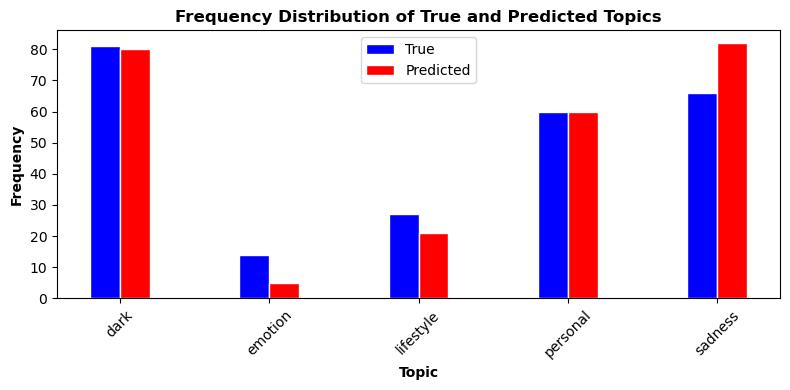

In [1621]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of the actual topics in the test set
unique_true, counts_true = np.unique(y_test, return_counts=True)

# Plot the distribution of the predicted topics
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

plt.figure(figsize=(8,4))

# Create bar width
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(counts_true))
r2 = [x + barWidth for x in r1]

# Create subplot for 'true' distribution
plt.bar(r1, counts_true, color='b', width=barWidth, edgecolor='white', label='True')

# Create subplot for 'predicted' distribution
plt.bar(r2, counts_pred, color='r', width=barWidth, edgecolor='white', label='Predicted')

plt.xlabel('Topic', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Frequency Distribution of True and Predicted Topics', fontweight='bold')

plt.xticks([r + barWidth/2 for r in range(len(counts_true))], topics, rotation=45)

plt.legend()

plt.tight_layout()
plt.savefig('topic_distribution.png')
plt.show()